# Regression Linéaire

### 4DS1

Objectif: Il s’agit de prédire le prix de biens immobiliers en fonction d’informations concernant l’environnement en utilisant le dataset `houses_to_rent_v2`.
Pour plus d'information : [houses_to_rent_v2](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [ ]:
#Chargement des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Chargement des données
data = pd.read_csv('houses_to_rent_v2.csv')
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
data.shape

(10692, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [ ]:
# afficher les noms des variables explicatives (“feature”)
data.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [ ]:
#Pair plot : Une matrice représentant les éventuelles dépendances entre les éléments deux à deux
sns.pairplot(data, hue='total (R$)', height=2.5);

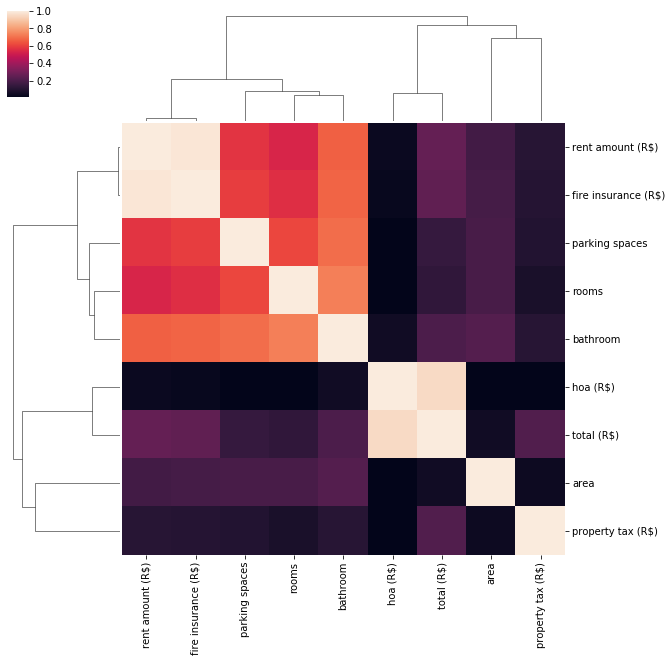

In [ ]:
sns.clustermap(data.corr())

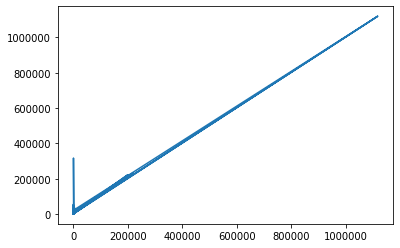

In [ ]:
plt.plot(data[['hoa (R$)']],data[['total (R$)']])

# Régression linéaire simple

## $$f(X)=aX+b $$

In [ ]:
# Dans un premier temps, nous estimons le prix d'une maison
#en utilisant une seule variable soit 'hoa (R$)'
X = data[['hoa (R$)']]
y = data[['total (R$)']]
print(X.shape)
print(X.shape)

(10692, 1)
(10692, 1)


In [ ]:
# chargement du modèle LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
#Créer une instance linreg1
linreg1 = LinearRegression()
#Entrainer linreg1 avec les sous-ensembles d'apprentissage puis caluler le test_score de linreg1
# Entrainer le modèle
linreg1.fit(X_train, y_train)
#Aficcher l'intercept de linreg1
print("b = ",linreg1.intercept_)
#Afficher les coefficients de linreg1
print("a = ",linreg1.coef_)

b =  [4295.28100915]
a =  [[1.0158321]]


### Les metriques d'un algorithme de regression
$$ R2 =1- \frac{\sum  (y_{vrai} - y_{pred} )^2}{\sum  (y_{vrai} - \overline{ y_{vrai}} )^2}  $$
$$ MAE = \frac{1}{m} \sum \lvert y_{vrai} - y_{pred} \rvert $$
$$ MSE = \frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 $$
$$ RMSE = \sqrt {\frac{1}{m} \sum  (y_{vrai} - y_{pred} )^2 }$$
$$MedianAE =median{\lvert y_{vrai} - y_{pred} \rvert} $$

In [ ]:
#Evaluation de la prédiction
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
y_pred = linreg1.predict(X_test)
print('test_score = ',linreg1.score(X_test,y_test))
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('MeadianAE = ', median_absolute_error(y_test, y_pred))

test_score =  0.9747592749586496
R2 =  0.9747592749586496
MAE =  15274501.524705721
RMSE =  3908.260677680766
MAE =  2885.6742816512447
MeadianAE =  2451.289109062496


In [ ]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
R2Adj = 1-(1-r2_score(y_test, y_pred))*(data.shape[0]-1)/(data.shape[0]-1-1)
print('R2 Adjusted = ',R2Adj)



R2 Adjusted =  0.9747569138056991


Text(0.5, 1.0, 'Actuals vs Regression Line')

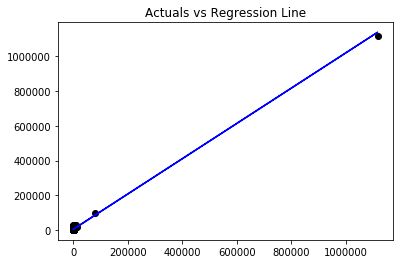

In [ ]:
#Plot Our Actual and Predicted Values
plt.plot(X_test, y_test, 'o', color='black');
plt.plot(X_test,y_pred,color='blue')
plt.title("Actuals vs Regression Line")

In [ ]:
import statsmodels.api as sm
est = sm.OLS(y_test, X_test)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:             total (R$)   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          3.823e+04
Date:                Mon, 04 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:03:31   Log-Likelihood:                         -21577.
No. Observations:                2139   AIC:                                  4.316e+04
Df Residuals:                    2138   BIC:                                  4.316e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Régression linéaire multiple

## $$f(X_1,X_2,...)= a_0 + a_1*X_1 + a_2*X_2 + .... + a_{12}*X12$$

## $$f(X_1,X_2,...)= a_0 + a_1*X_1 + a_2*X_2 + .... + a_{12}*X12$$

In [ ]:
print(data.dtypes)
print(data.floor.unique())
data["floor"].replace({"-": "0"}, inplace=True)
print(data.floor.unique())
print((data.floor=='-').sum())
data['floor'] = pd.to_numeric(data['floor'], errors='coerce')
print(data.dtypes)

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object
['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
['7' '20' '6' '2' '1' '0' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
0
city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                   int64
animal                 object
furniture              object
hoa (R$)      

In [ ]:
data = data.drop(['city','animal','furniture'], axis=1)
X = data.drop('total (R$)', axis=1)
y = data[['total (R$)']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
#Régression linéaire multiple (toutes les variables de houses)
linreg2 = LinearRegression(fit_intercept= True, normalize=False)
#pour imposer une ordonnée à l'origine (Par défaut ='True')
# Normalisation des données normalize=True
linreg2.fit(X_train, y_train)
y_pred = linreg2.predict(X_test)

print('test_score = ',linreg2.score(X_test,y_test))
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('MeadianAE = ', median_absolute_error(y_test, y_pred))

print('Intercept = ', linreg2.intercept_)
print('Coefficients : ',linreg2.coef_)

test_score =  0.9999998909224999
R2 =  0.9999998909224999
MAE =  66.00858092964444
RMSE =  8.124566507183287
MAE =  0.676505717206501
MeadianAE =  0.12924668211053358
Intercept =  [0.05414899]
Coefficients :  [[ 1.46373864e-05 -2.61521652e-02  3.54584401e-02  5.32744251e-03
  -1.10067340e-02  1.00009870e+00  9.99972698e-01  9.99929430e-01
   1.00346063e+00]]


Text(0, 0.5, 'Residual')

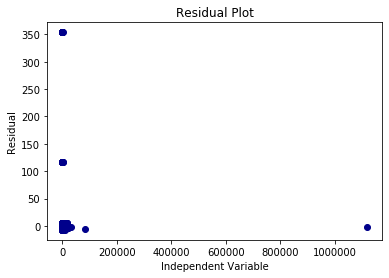

In [ ]:
residuals = y_test-y_pred
plt.plot(X_test,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [ ]:
import statsmodels.api as sm
est1 = sm.OLS(y_test, X_test)
est2 = est1.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:             total (R$)   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.291e+09
Date:                Mon, 04 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:20:18   Log-Likelihood:                         -7515.8
No. Observations:                2139   AIC:                                  1.505e+04
Df Residuals:                    2130   BIC:                                  1.510e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

# Sélection de variables

In [ ]:
# Define the X (inputs) and y (target) features
X = data.drop("total (R$)", axis=1)
y = data["total (R$)"]

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [ ]:
#Centrage-réduction des données des données
#sc = StandardScaler()
#X_sc = sc.fit_transform(X)
#X = pd.DataFrame(X_sc, columns=X.columns)
#X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(8553, 9)
(2139, 9)


**VarianceThreshold** removes features with a variance less than the specified threshold. Consider a feature that takes the same value for all the observations (rows) in the dataset. It would not add any informative power to a model. Using this feature also adds an unnecessary computation burden. Thus, we should just eliminate it from the dataset.

In [ ]:
# Variance de chaque variable
X.var()

area                   2.883872e+05
rooms                  1.371865e+00
bathroom               1.980207e+00
parking spaces         2.526576e+00
floor                  3.683337e+01
hoa (R$)               2.431200e+08
rent amount (R$)       1.161818e+07
property tax (R$)      9.658622e+06
fire insurance (R$)    2.281785e+03
dtype: float64

In [ ]:
# Perform feature selection using a variance threshold

from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.02))
sel.fit(X_train)

print("Sélection de variables :", sel.get_support())
print("Variables sélectionnées :", list(X.columns[sel.get_support()]))
print("Variables supprimées :", list(X.columns[~sel.get_support()]))

Sélection de variables : [ True  True  True  True  True  True  True  True  True]
Variables sélectionnées : ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']
Variables supprimées : []


In [ ]:
# Suppression de variables à faible variance
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test))
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))


test_score =  0.9999998909224999
R2 =  0.9999998909224999
MAE =  66.00858092964444
RMSE =  8.124566507183287
MAE =  0.676505717206501
Meadian =  0.12924668211053358


## Selection de variables avec `SelectKBest`

It takes as a parameter a score function, which must be applicable to a pair (X, y). The score function must return an array of scores, one for each feature X[:,i] of X

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(8553, 9)
(2139, 9)


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
#Score function:
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

kbest = SelectKBest(score_func=f_regression, k=3)
kbest.fit(X_train, y_train)
print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(X.columns[kbest.get_support()]))
print("Variables supprimées :", list(X.columns[~kbest.get_support()]))

Sélection de variables : [False False False False False  True  True False  True]
Scores de variables : [2.76393145e+01 2.53437573e+02 5.42058013e+02 3.04730585e+02
 1.70380528e+01 5.32398219e+04 9.79526695e+02 7.43619131e+02
 9.01222012e+02]
Variables sélectionnées: ['hoa (R$)', 'rent amount (R$)', 'fire insurance (R$)']
Variables supprimées : ['area', 'rooms', 'bathroom', 'parking spaces', 'floor', 'property tax (R$)']


In [ ]:
X_train = kbest.transform(X_train)
X_test = kbest.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test))
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))


test_score =  0.9993986750870916
R2 =  0.9993986750870916
MAE =  363893.59988731396
RMSE =  603.2359404804342
MAE =  252.52822557392173
Meadian =  131.88196371080494


## Sélection de variables avec Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) works by eliminating features recursively. The elimination is done based on outputs from an estimator that assigns some kind of weights to features. For instance, the weights can be the coefficients of a linear regression or feature importances of a decision tree.
The process starts by training the estimator on the entire dataset. Then, the least important features are pruned. After that, the estimator is trained with the remaining features and the least important features are pruned again. This process is repeated until the desired number of features is reached.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(8553, 9)
(2139, 9)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=8)
rfe.fit(X_train, y_train)
print("Sélection de variables", rfe.support_)
print("Classement de variables", rfe.ranking_)
print("Variables sélectionnées :", list(X.columns[rfe.support_]))

Sélection de variables [False  True  True  True  True  True  True  True  True]
Classement de variables [2 1 1 1 1 1 1 1 1]
Variables sélectionnées : ['rooms', 'bathroom', 'parking spaces', 'floor', 'hoa (R$)', 'rent amount (R$)', 'property tax (R$)', 'fire insurance (R$)']


In [ ]:
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(8553, 8)
(2139, 8)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test))
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))


test_score =  0.9999998909219585
R2 =  0.9999998909219585
MAE =  66.00890857976027
RMSE =  8.124586671318134
MAE =  0.676625346706062
Meadian =  0.12941959359250177
